<a href="https://colab.research.google.com/github/WlonWUsk/AryaDevRijal-Concepts-of-AI-and-Machine-Learning/blob/main/Aryadev_Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

data = pd.read_csv(url, names=columns)
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Summary statistics
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#these are columns where 0 is invalid
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in invalid_cols:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].mean(), inplace=True)

#we are checking for missing value
data.isnull().sum()


/tmp/ipython-input-677531935.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Separate features and labels
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values


In [ ]:
def train_test_split_scratch(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split], indices[split:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

X_train.shape, X_test.shape


((537, 8), (231, 8))

In [ ]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))


In [ ]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]
    return np.bincount(k_labels).argmax()


In [ ]:
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])


In [ ]:
def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100


In [ ]:
predictions = knn_predict(X_test, X_train, y_train, k=5)
accuracy = compute_accuracy(y_test, predictions)

print(f"Accuracy (Original Data): {accuracy:.2f}%")


Accuracy (Original Data): 70.56%


PROBLEM 2:


In [ ]:
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


In [ ]:
X_scaled = min_max_scale(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)


In [ ]:
pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=5)
acc_scaled = compute_accuracy(y_test_s, pred_scaled)

print(f"Accuracy (Scaled Data): {acc_scaled:.2f}%")


Accuracy (Scaled Data): 76.19%


PROBLEM 3

In [ ]:
def experiment_k(X_train, y_train, X_test, y_test, k_values):
    accuracies = []
    times = []

    for k in k_values:
        start = time.time()
        preds = knn_predict(X_test, X_train, y_train, k)
        times.append(time.time() - start)
        accuracies.append(compute_accuracy(y_test, preds))

    return accuracies, times


In [ ]:
k_values = range(1, 16)

acc_orig, time_orig = experiment_k(X_train, y_train, X_test, y_test, k_values)
acc_scaled, time_scaled = experiment_k(X_train_s, y_train_s, X_test_s, y_test_s, k_values)


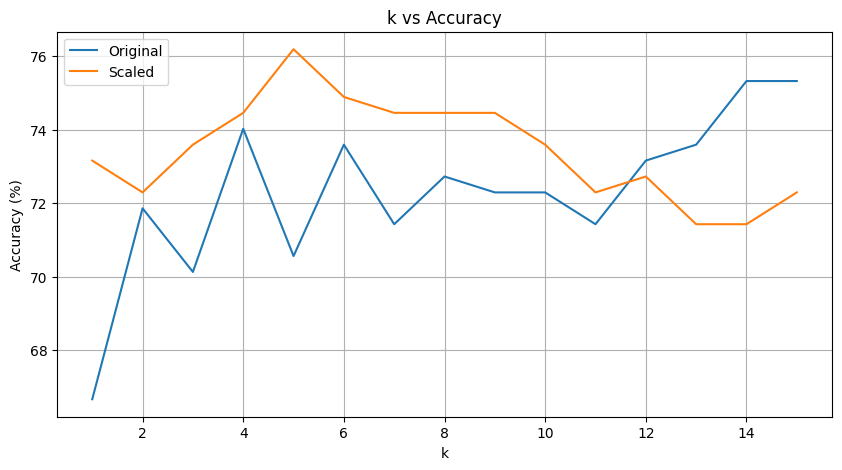

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(k_values, acc_orig, label="Original")
plt.plot(k_values, acc_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.legend()
plt.grid()
plt.show()


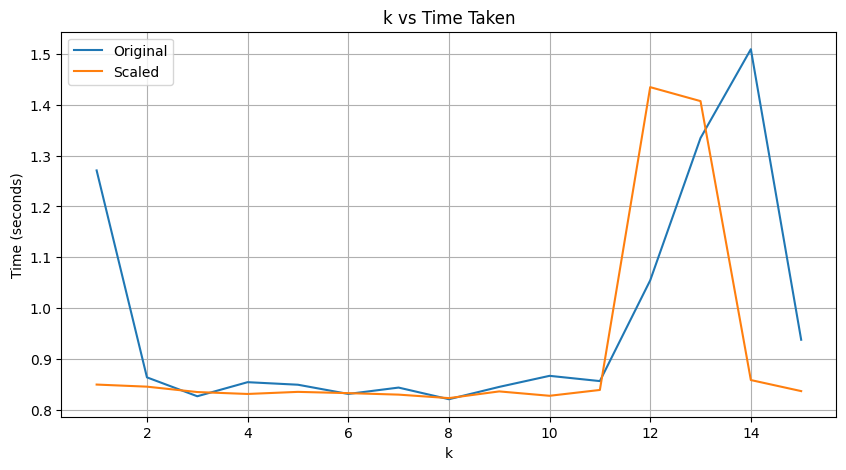

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(k_values, time_orig, label="Original")
plt.plot(k_values, time_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.title("k vs Time Taken")
plt.legend()
plt.grid()
plt.show()


PROBLEM 4:

challenges of KNN that i figured :
Slow for large datasets
High memory usage
Poor performance in high dimensions

effiency improvements we can use ⁉
KD-Trees / Ball Trees
Approximate Nearest Neighbors
PCA / Feature Reduction
Feature scaling

# New section